In [1]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
%matplotlib inline 

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

In [2]:
### we will set the seed to 0
np.random.seed(0)

centers_blob = [ [4, 4], [-2, -1], [2, -3], [1, 1] ]

#Generate the dataset
X, y = make_blobs(n_samples=5000, centers=centers_blob, cluster_std=0.9)

!wget -q -O 'customer_segmentation.csv' https://cocl.us/customer_dataset
print('Data downloaded!')

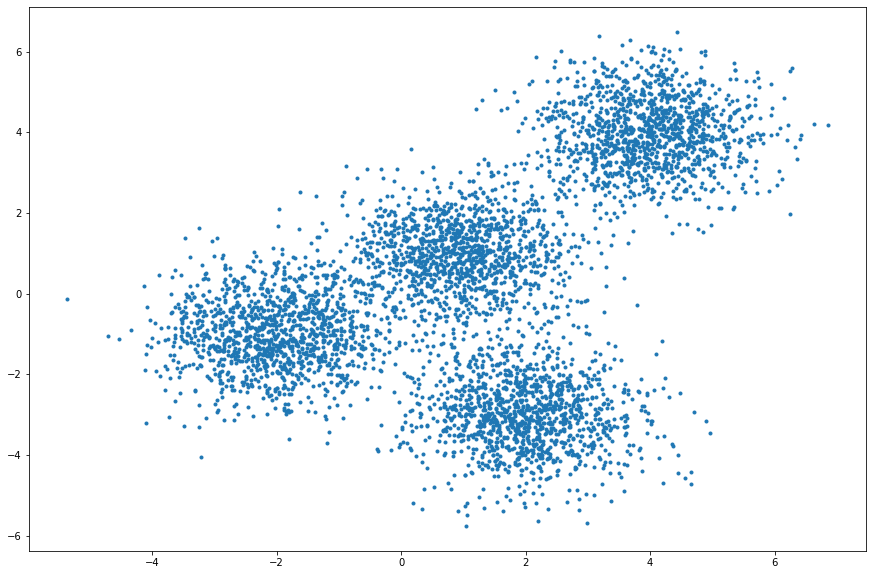

In [3]:
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [4]:
# init="k-means++"" for auto & smart initial cluster centers, 
# clusters = 4, K means model with max number of clusters
# n_init=12, Number of times the k-means will iterate with different centroid seeds

KMeans_model = KMeans(init="k-means++", n_clusters=4, n_init=12)
KMeans_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
# data points assigned to each clusters
data_points = KMeans_model.labels_

# Fetch centroids of 4 clusters
centers = KMeans_model.cluster_centers_

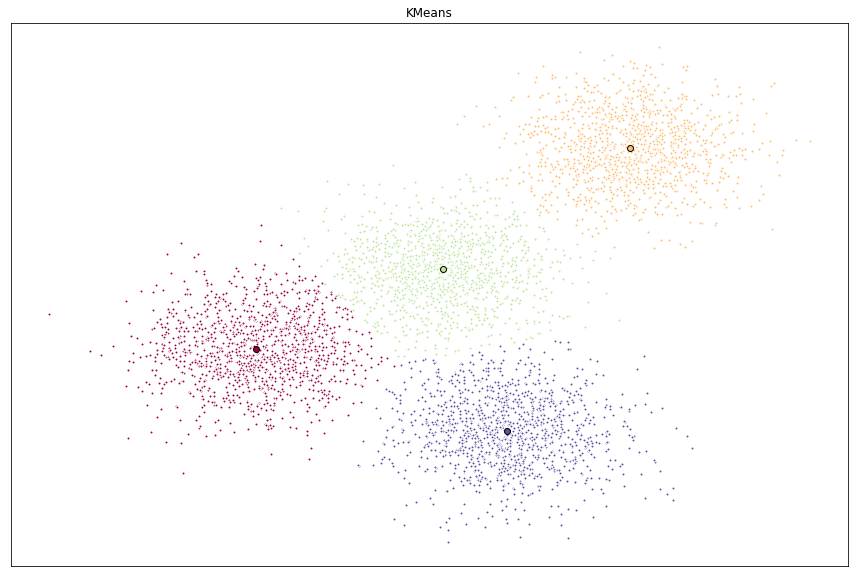

In [6]:
# initialize the plot with the specified dimensions
fig = plt.figure(figsize=(15, 10))

# assign unique colors to each cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(data_points))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.

for k, col in zip(range(len(set(data_points))), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (data_points == k)
    
    # define the centroid, or cluster center.
    cluster_center = centers[k]
    
    # plot the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# title of the plot
ax.set_title('KMeans')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()


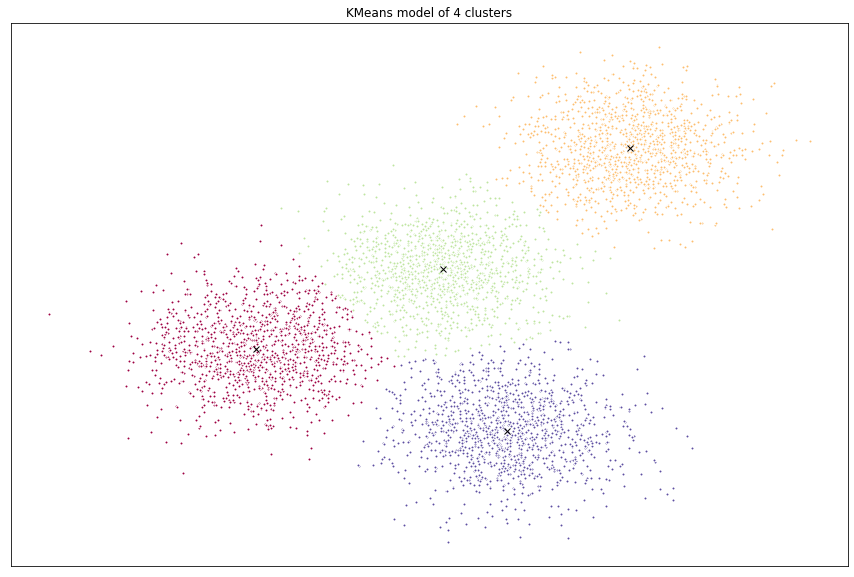

In [8]:
# initialize the plot with the specified dimensions
fig = plt.figure(figsize=(15, 10))

# assign different colors to each cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(data_points))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len(set(data_points))), colors):
    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (data_points == k)
    
    # define the centroid, or cluster center.
    cluster_center = centers[k]
    
    # plot the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'x', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# title of the plot
ax.set_title('KMeans model of 4 clusters')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()
